# Trading German Stocks Based on Moving Average Signals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data
from datetime import datetime

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [55]:
# Define start and end date
start = datetime(2010, 8, 10)
end = datetime(2020, 8, 12)

In [5]:
# Create a list of ticker symbols of stocks in the DAX
simple_symbols = ['1COV', 'ADS', 'ALV', 'BAS', 'BAYN', 'BEI', 'BMW', 'CON', 'DAI', 'DB1', 'DBK', 'DPW', 'DTE', 'DWNI', 'EOAN', 
              'FME', 'FRE', 'HEI', 'HEN3', 'IFX', 'LIN', 'MRK', 'MTX', 'MUV2', 'RWE', 'SAP', 'SIE', 'VNA', 'VOW3', 'WDI']

In [56]:
# The DAX symbols actually have  '.DE' at the end so let's add that
dax_symbols = [x + '.DE' for x in simple_symbols]

In [57]:
# Import the adjusted closing prices for these stocks from Yahoo Finance
closing_prices = data.DataReader(dax_symbols, data_source='yahoo', start=start, end=end)['Adj Close']

In [58]:
# Inspect the first 5 rows
closing_prices.head()

Symbols,1COV.DE,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CON.DE,DAI.DE,DB1.DE,...,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,VNA.DE,VOW3.DE,WDI.DE
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-09,NaN,36.114822,54.316971,28.729412,36.338596,37.790836,30.260462,37.835964,25.970423,39.440506,...,48.732174,27.545280,37.584171,68.034470,35.209793,30.150309,53.743507,NaN,65.661133,8.142384
2010-08-10,NaN,35.682137,53.502369,28.471975,35.921902,37.742970,29.604778,36.814709,25.509424,39.389595,...,48.084042,27.394953,38.284084,67.659111,34.901630,30.095264,53.044746,NaN,65.334328,8.082641
2010-08-11,NaN,34.942783,52.003967,27.822100,35.383411,37.299084,28.955925,35.728905,24.868980,38.204117,...,47.829998,27.082436,37.182438,66.877098,34.077866,29.621052,51.667717,NaN,63.782051,7.836925
2010-08-12,NaN,35.278847,51.575863,27.982214,35.612076,37.242516,28.617840,34.540596,24.175945,37.760483,...,47.804077,27.153645,36.962948,66.751976,33.725670,29.612595,51.489643,NaN,63.667686,7.765618
2010-08-13,NaN,35.270443,51.385590,27.501875,35.342865,37.277325,28.607595,34.954418,24.222353,37.353207,...,47.617432,26.821346,36.834564,66.407890,33.467857,29.519440,51.379990,NaN,62.924210,7.824397


In [60]:
# Inspect how many columns we have
len(closing_prices.columns)

30

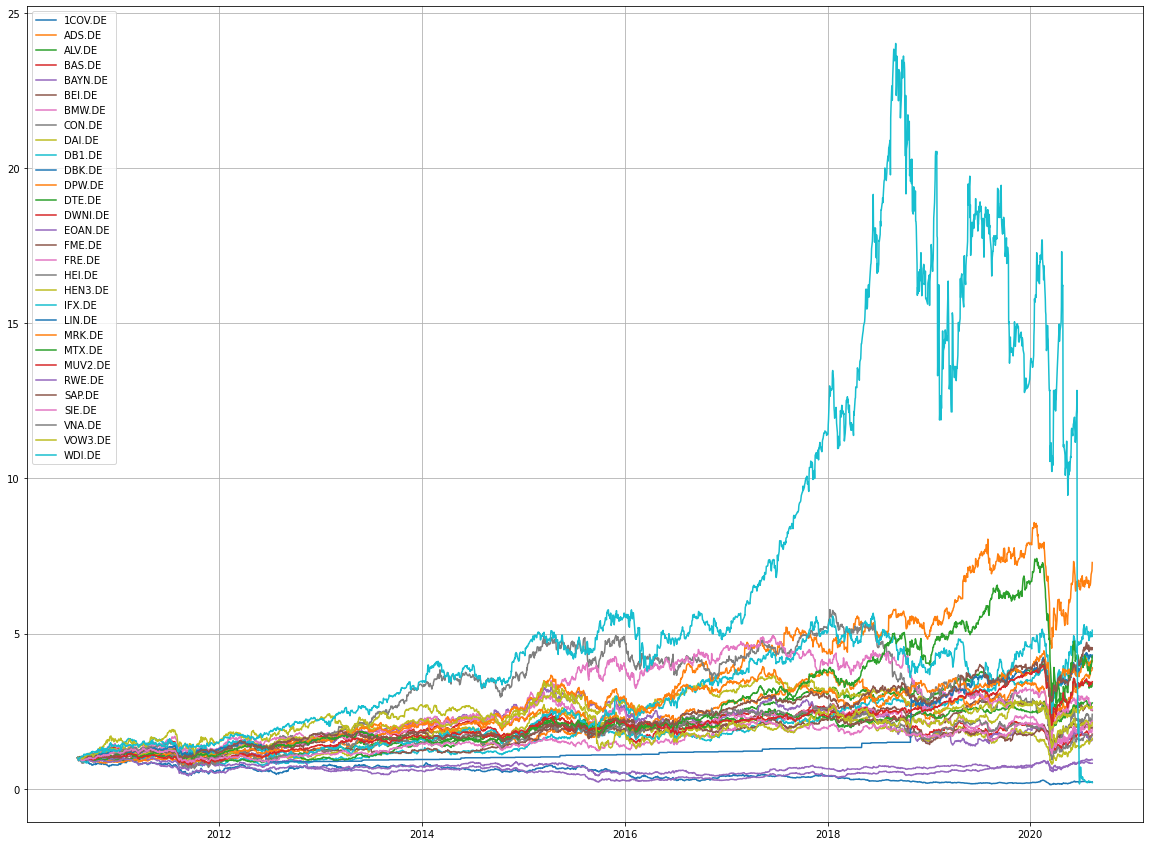

In [72]:
# Let's also have a quick look at all price movements in a normalised fashion
normalised = closing_prices / closing_prices.iloc[0]
plt.figure(figsize=(20,15))
plt.plot(normalised)
plt.grid()
plt.legend(labels=closing_prices.columns)

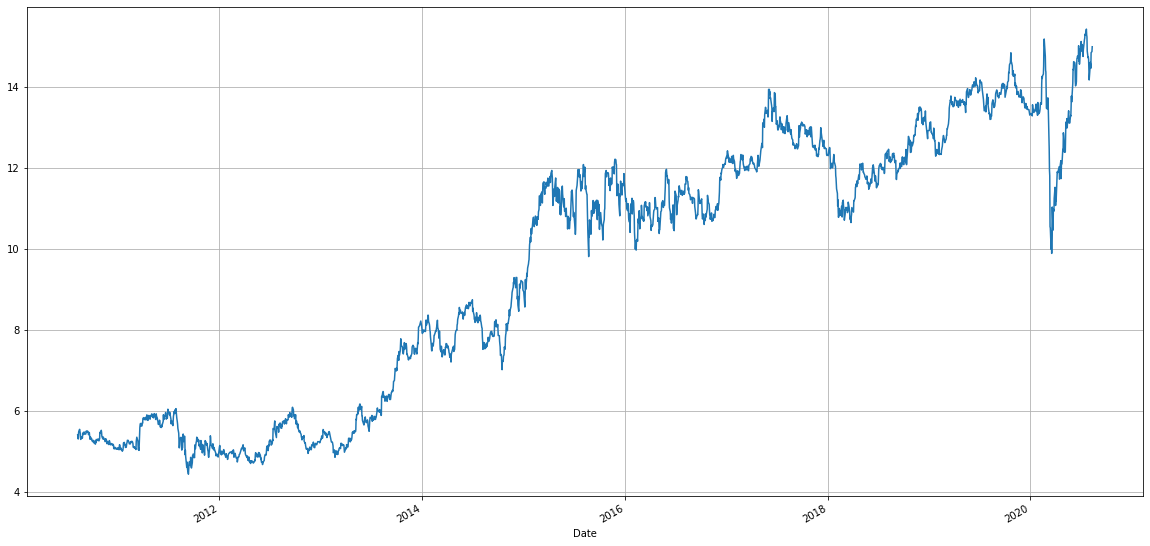

In [63]:
# Let's get a closer look at one of these individual stocks, Deutsche Telecom
closing_prices['DTE.DE'].plot(grid=True, figsize=(20,10))

In [64]:
# Extract a new DataFrame to be used for in-depth analysis of Deutsche Telekom
tel = pd.DataFrame(closing_prices['DTE.DE'].copy())
telecom = tel.rename(columns={'DTE.DE': 'Adj Closing'})
telecom.head()

,Adj Closing
Date,
2010-08-09,5.408797
2010-08-10,5.369470
2010-08-11,5.309169
2010-08-12,5.448125
2010-08-13,5.497938


In [65]:
# Create list of different moving averages to be used
moving_avgs = [10, 20, 50, 100, 200]

In [66]:
for avg in moving_avgs:
    telecom[str(avg) + 'd'] = np.round(telecom['Adj Closing'].rolling(avg).mean(), 2)

In [67]:
telecom.tail()

,Adj Closing,10d,20d,50d,100d,200d
Date,,,,,,
2020-08-05,14.565,14.64,14.88,14.65,13.30,13.54
2020-08-06,14.455,14.56,14.86,14.67,13.33,13.54
2020-08-07,14.840,14.55,14.86,14.70,13.38,13.54
2020-08-10,14.865,14.57,14.86,14.72,13.43,13.55
2020-08-11,14.985,14.59,14.86,14.75,13.47,13.55


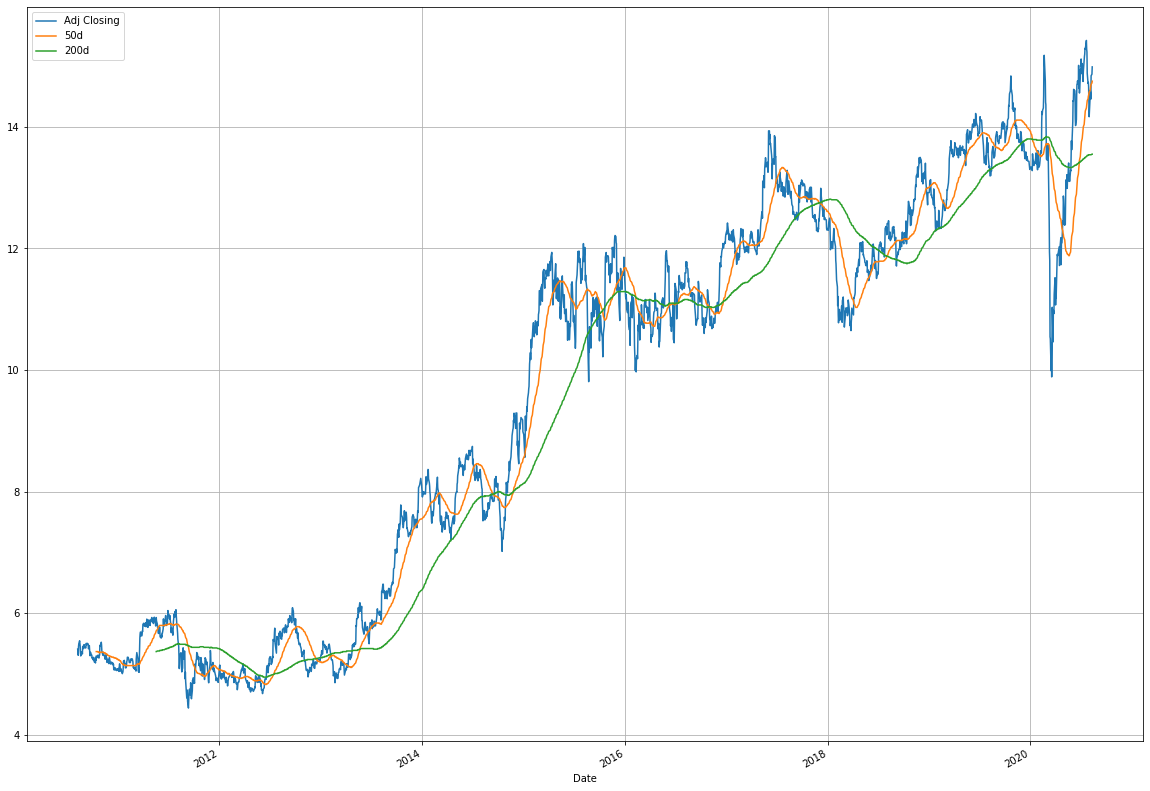

In [68]:
# Plot Telecom stock price with 50 and 250 day moving averages
telecom[['Adj Closing', '50d', '200d']].plot(grid=True, figsize=(20,15))

In [73]:
# Extract a new DataFrame to be used for in-depth analysis of Deutsche Telekom
ads = pd.DataFrame(closing_prices['ADS.DE'].copy())
adidas = ads.rename(columns={'ADS.DE': 'Adj Closing'})
adidas.head()

,Adj Closing
Date,
2010-08-09,36.114822
2010-08-10,35.682137
2010-08-11,34.942783
2010-08-12,35.278847
2010-08-13,35.270443


In [74]:
for avg in moving_avgs:
    adidas[str(avg) + 'd'] = np.round(adidas['Adj Closing'].rolling(avg).mean(), 2)

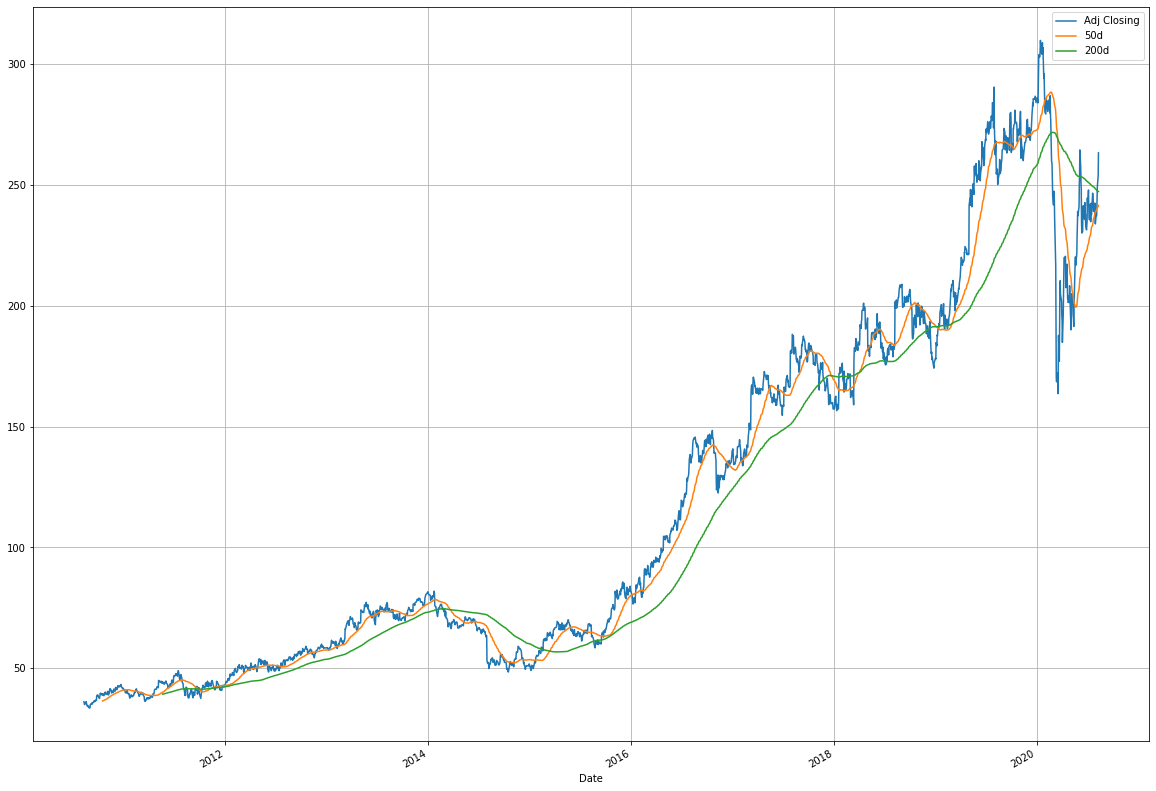

In [125]:
# Plot Adidas stock price with 50 and 250 day moving averages
adidas[['Adj Closing', '50d', '200d']].plot(grid=True, figsize=(20,15))

In [76]:
# Create column for the difference between short and long term trend
adidas['50-200'] = adidas['50d'] - adidas['200d']
adidas.tail()

,Adj Closing,10d,20d,50d,100d,200d,50-200
Date,,,,,,,
2020-08-05,239.800003,238.69,239.09,240.06,220.00,247.76,-7.70
2020-08-06,244.300003,238.76,239.48,240.37,220.73,247.60,-7.23
2020-08-07,249.399994,239.79,240.17,240.70,221.54,247.47,-6.77
2020-08-10,253.800003,241.26,241.08,240.99,222.36,247.36,-6.37
2020-08-11,263.299988,243.70,242.14,241.51,223.30,247.30,-5.79


In [114]:
# Compute a column with buy or sell signals
adidas['Signal'] = np.where((adidas['50-200'] > 0) & (adidas['50-200'].shift(1) < 0), 1, 0)

In [115]:
adidas['Signal'] = np.where((adidas['50-200'] < 0) & (adidas['50-200'].shift(1) > 0), -1, 0)

In [116]:
# Compute a column with the Regime
adidas['Regime'] = np.where(adidas['50-200'] > 0, 1, 0)
adidas['Regime'].value_counts()

1    1848
0     689
Name: Regime, dtype: int64

In [ ]:
adidas['Regime'] = np.where(adidas['50-200'] < 0, -1, 0)

In [117]:
# Compute a column with the daily log returns
adidas['Returns'] = np.log(adidas['Adj Closing'] / adidas['Adj Closing'].shift(1))

In [118]:
adidas.tail()

,Adj Closing,10d,20d,50d,100d,200d,50-200,Signal,Regime,Returns,Strategy
Date,,,,,,,,,,,
2020-08-05,239.800003,238.69,239.09,240.06,220.00,247.76,-7.70,0,0,0.010480,-0.010480
2020-08-06,244.300003,238.76,239.48,240.37,220.73,247.60,-7.23,0,0,0.018592,-0.018592
2020-08-07,249.399994,239.79,240.17,240.70,221.54,247.47,-6.77,0,0,0.020661,-0.020661
2020-08-10,253.800003,241.26,241.08,240.99,222.36,247.36,-6.37,0,0,0.017489,-0.017489
2020-08-11,263.299988,243.70,242.14,241.51,223.30,247.30,-5.79,0,0,0.036747,-0.036747


In [119]:
# Compute column with returns of the strategy
adidas['Strategy'] = adidas['Regime'].shift(1) * adidas['Returns']

In [120]:
park = adidas['Returns'].cumsum()
strategy = adidas['Strategy'].cumsum()
park, strategy

(Date
 2010-08-09         NaN
 2010-08-10   -0.012053
 2010-08-11   -0.032991
 2010-08-12   -0.023420
 2010-08-13   -0.023658
                 ...   
 2020-08-05    1.893102
 2020-08-06    1.911694
 2020-08-07    1.932355
 2020-08-10    1.949843
 2020-08-11    1.986591
 Name: Returns, Length: 2537, dtype: float64,
 Date
 2010-08-09         NaN
 2010-08-10    0.000000
 2010-08-11    0.000000
 2010-08-12    0.000000
 2010-08-13    0.000000
                 ...   
 2020-08-05    1.019679
 2020-08-06    1.019679
 2020-08-07    1.019679
 2020-08-10    1.019679
 2020-08-11    1.019679
 Name: Strategy, Length: 2537, dtype: float64)

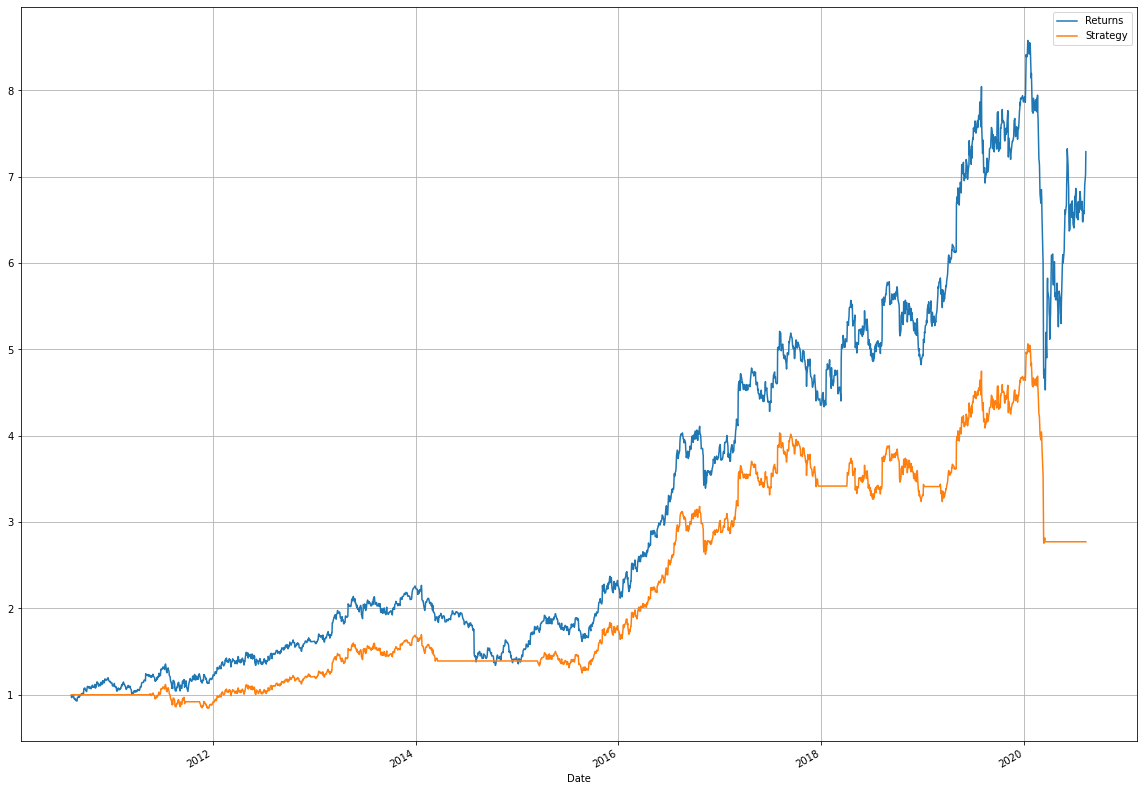

In [121]:
# Plot the cumulative returns of the Strategy vs simply parking the money
adidas[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(20,15))